In [1]:
#Top box office revenue data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kalilurrahman/top-box-office-revenue-data-english-movies")

print("Path to dataset files:", path)


C:\Users\Brian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Brian\.cache\kagglehub\datasets\kalilurrahman\top-box-office-revenue-data-english-movies\versions\676


In [2]:
# Import Seaborn
# Import Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

                Brand        Total  Releases  \
0       Marvel Comics  15806336901        69   
1  Legendary Pictures   7018798067        56   
2           Lucasfilm   6325022918        39   
3               Pixar   6078217662        28   
4           DC Comics   5815645953        46   

                                   #1 Release  Lifetime Gross  
0                           Avengers: Endgame       858373000  
1                              Jurassic World       652270625  
2  Star Wars: Episode VII - The Force Awakens       936662225  
3                               Incredibles 2       608581744  
4                             The Dark Knight       533345358  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Brand           45 non-null     object
 1   Total           45 non-null     int64 
 2   Releases        45 non-null     int64 
 3   

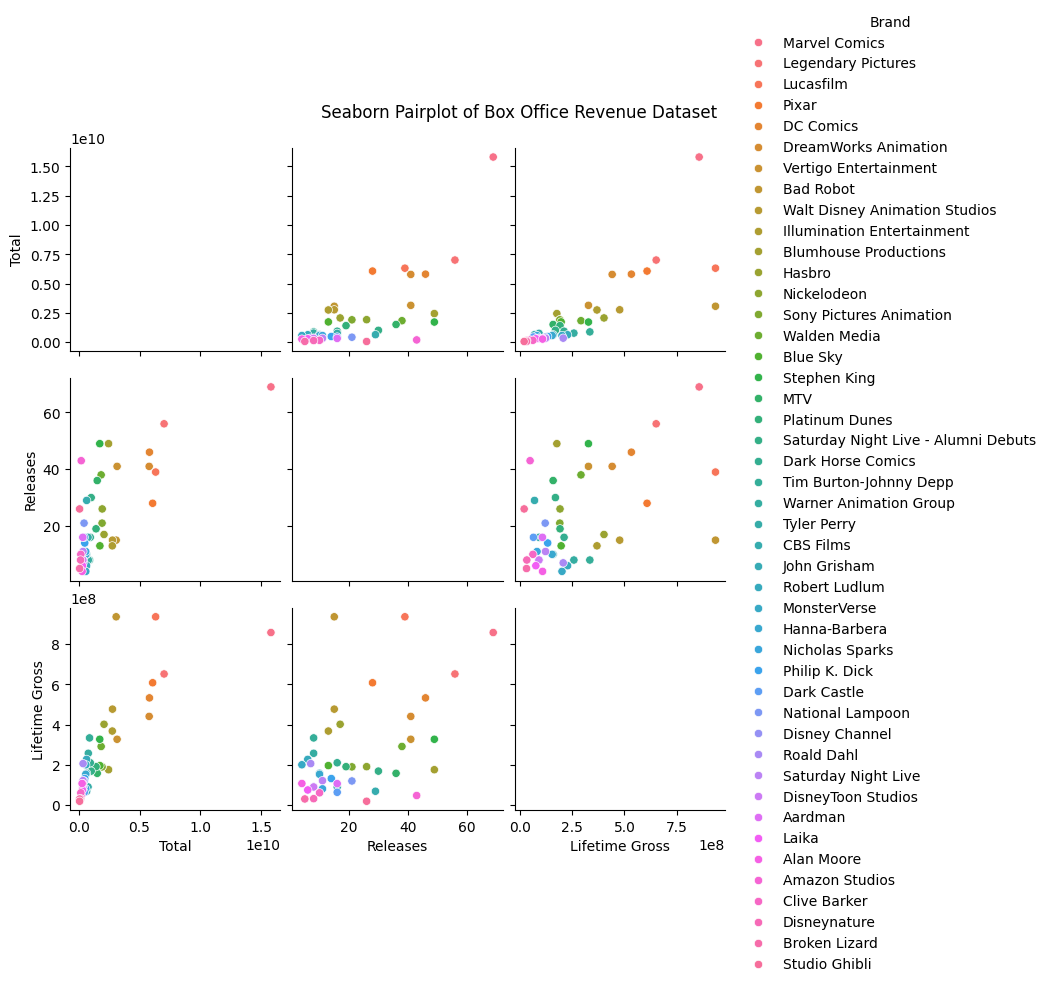

In [3]:
import pandas as pd
# Load dataset with tab delimiter
file_path = r"C:\Users\Brian\.cache\kagglehub\datasets\kalilurrahman\top-box-office-revenue-data-english-movies\versions\674\bomojobrandindices.csv"
bomojo = pd.read_csv(file_path, delimiter='\t')  #Specify delimiter

# Inspect dataset
print(bomojo.head())
print(bomojo.info())

# remove commas or dollar signs from Lifetime gRoss column
if 'Lifetime Gross' in bomojo.columns:
    bomojo['Lifetime Gross'] = bomojo['Lifetime Gross'].replace('[\$,]', '', regex=True).astype(float)

# Select numerical columns
numerical_cols = bomojo.select_dtypes(include=['float', 'int']).columns
print("Numerical columns:", numerical_cols)

# Ensure there are numerical columns
if len(numerical_cols) > 0:
    sns.pairplot(bomojo, vars=numerical_cols, hue='Brand')
    plt.suptitle('Seaborn Pairplot of Box Office Revenue Dataset', y=1.02)  # Title for the plot
    plt.show()
else:
    print("No numerical columns available for pairplot.")

In [4]:
import altair as alt
import kagglehub

# Download dataset
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")
file_path = f"{path}/IMDB_Top_1000.csv"
# Load dataset
imdb = pd.read_csv(file_path)

# Clean 'Gross' column
imdb['Gross'] = imdb['Gross'].replace('########', None).str.replace(',', '').astype(float)

# Clean other numeric columns
imdb['Runtime'] = imdb['Runtime'].str.extract('(\d+)').astype(float)  # Extract numeric runtime
imdb['IMDB_Rating'] = imdb['IMDB_Rating'].astype(float)

# Prepare Altair scatter plot
chart = alt.Chart(imdb).mark_circle(size=60).encode(
    x=alt.X('Gross', title='Gross Revenue (in $)', scale=alt.Scale(zero=False)),
    y=alt.Y('IMDB_Rating', title='IMDB Rating', scale=alt.Scale(zero=False)),
    color=alt.Color('Genre', legend=alt.Legend(title="Genre")),
    size=alt.Size('No_of_Votes', title='Number of Votes', scale=alt.Scale(range=[10, 1000])),
    tooltip=[
        alt.Tooltip('Series_Title', title='Title'),
        alt.Tooltip('IMDB_Rating', title='IMDB Rating'),
        alt.Tooltip('Gross', title='Gross Revenue', format='$,.2f'),
        alt.Tooltip('No_of_Votes', title='Votes'),
        alt.Tooltip('Genre', title='Genre')
    ]
).properties(
    title="IMDB Top 1000: Gross Revenue vs. IMDB Rating",
    width=800,
    height=500
).interactive()

# Display the chart
chart


alt.Chart(...)